<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 140.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 169.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 137.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 138.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 131.9 MB/s eta 0:00:00


Import pandas module


In [73]:
import pandas as pd


Import matplotlib


In [74]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [98]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [87]:
duplicate_rows = df[df.duplicated()]
print('The number of duplicated rows are:', len(duplicate_rows))

duplicate_rows.head()

The number of duplicated rows are: 20


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [77]:
duplicate_columns = duplicate_rows.nunique()
MainBranch = duplicate_rows['MainBranch'].value_counts()
Employment = duplicate_rows['Employment'].value_counts()
RemoteWork = duplicate_rows['RemoteWork'].value_counts()
print(MainBranch)
print(Employment)
print(RemoteWork)

MainBranch
I am a developer by profession                                                           12
I code primarily as a hobby                                                               3
I am not primarily a developer, but I write code sometimes as part of my work/studies     3
I am learning to code                                                                     2
Name: count, dtype: int64
Employment
Employed, full-time                                                         10
Student, full-time                                                           4
Student, full-time;Not employed, but looking for work                        1
Independent contractor, freelancer, or self-employed                         1
Student, full-time;Employed, part-time                                       1
Employed, full-time;Employed, part-time                                      1
Employed, full-time;Independent contractor, freelancer, or self-employed     1
Retired                        

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


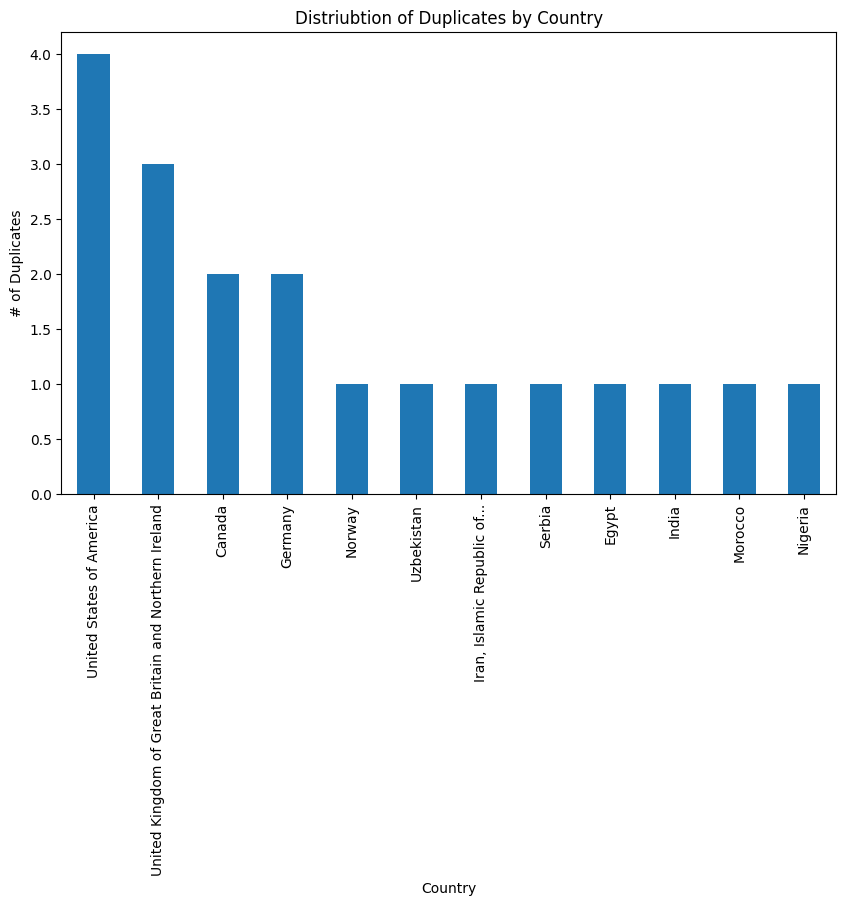

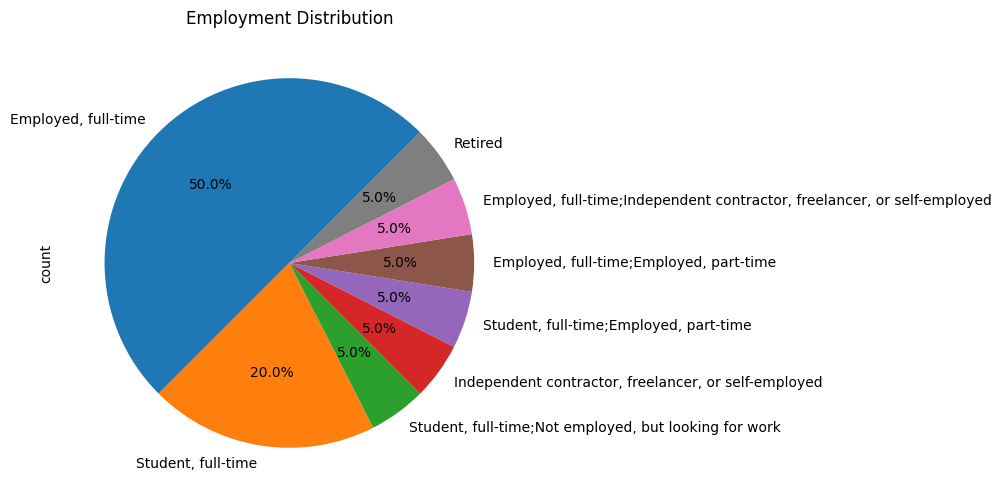

In [78]:
country = duplicate_rows['Country'].value_counts()
plt.figure(figsize=(10,6))
country.plot(kind='bar')
plt.title('Distriubtion of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('# of Duplicates')
plt.show()

plt.figure(figsize=(10,6))
Employment.plot(kind='pie',autopct='%1.1f%%',startangle=45)
plt.title('Employment Distribution')
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [99]:
subset = ['MainBranch','Employment','Age', 'EdLevel', 'LearnCode']
unique_df = df.drop_duplicates(subset=subset)
print(unique_df.shape[0])

20823


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


In [100]:
Task 1: Take the data set and look for complete row duplicates, and understand what the dataset strcuture is, but utilizing a duplicate function.
Task 2: Utilizing the duplicate rows, we then identify what category is had duplicate data values withint that dataset, by breaking utilizing the columns to find the frequency that the data is duplicated.
Task 3:  Using matplotlib, we then plot the duplication, specifically for "Country", and 'Employment' to see what the distribution among the values are in a displayed graph and pie chart.
Task 4:  After review of the distribution, we identify the categories that are most crucial for utilization of a unique quality of the data, and split that from all duplicates. 

SyntaxError: invalid syntax (1948115785.py, line 1)

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
